In [1]:
!pip install -q condacolab
import condacolab
condacolab.install ()
!conda install -c rdkit rdkit


✨🍰✨ Everything looks OK!
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

# All requested packages already installed.



In [2]:
!pip install molgx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.7/159.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.7/797.7 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
from rdkit import RDLogger
from IPython.display import HTML
from molgx import *

In [4]:
# logger configuration
# logging.basicConfig(level=logging.DEBUG)
# logging.basicConfig(level=logging.INFO)
logging.basicConfig()

In [5]:
# Supress RDKit logger message
RDLogger.DisableLog('rdApp.*')
# Suppress warnings of Python library
import warnings
warnings.filterwarnings('ignore')

(0) Data Preparation: from CSV File

The easiest way to prepare data for MolGX is to create MolData object from a csv file.
A sample csv file is in example/sample_data/QM9_partial_500.csv. This data is extracted from part of the QM9 Dataset [1, 2]. The first column is the id of a molecule. Additionally, there should be a column named 'SMILES' or 'SMARTS' which specifies molecular structure (different column names can be specified by optional arguments smiles_col and smarts_col). The other columns are automatically regarded as properties of a molecule.

In [56]:
csvfn = './PCO2-Tg-Thd-data-all-simulated.csv'
df = pd.read_csv(csvfn)

# Because open source version molgx cannot deal with hompolymer, convert OPSIN SMILES to SMILES
df['SMILES'] = [opsim.replace('[*:1]', '').replace('[*:2]', '') for opsim in df['OPSIN SMILES']]
df.head()

,Polymer_ID,Polymer_name,OPSIN SMILES,Tg (K),Td_1/2 (K),log10(P_CO2 (Barrer)),SMILES
0,746,poly(silanediylmethylene),[Si](C[*:2])[*:1],178.969311,453.171845,4.696604,[Si](C)
1,158,Poly(dimethylsilanediyl),[*:1][Si](C)(C)[Si](C)(C)[*:2],170.533265,408.658103,4.429005,[Si](C)(C)[Si](C)(C)
2,735,poly(dimethylsilanediyl),[*:1][Si](C)(C)[Si](C)(C)[*:2],170.533265,408.658103,4.429005,[Si](C)(C)[Si](C)(C)
3,747,poly[(methylsilanediyl)methylene],C[Si](C[*:2])[*:1],220.097968,447.668763,4.010414,C[Si](C)
4,731,poly[(dimethylsilanediyl)methylene],[*:1][Si](C)(C)C[*:2],175.053327,444.493538,3.831722,[Si](C)(C)C


In [60]:
# Save to another csv file for molgx
csvfn2 = './PCO2-Tg-Thd-data-all-simulated2.csv'
df2 = df.drop(columns=['OPSIN SMILES'])
df2.to_csv(csvfn2)

In [63]:
# create an instance of MolData from CSV file
moldata = MolData.read_csv(csvfn2)

In [64]:
# print properties stored in moldata
moldata.print_properties()

properties:['Polymer_ID', 'Polymer_name', 'Tg (K)', 'Td_1/2 (K)', 'log10(P_CO2 (Barrer))']


In [65]:
# get smiles and properties in dataframe
df = moldata.get_dataframe(mols=True, smiles=True, property=True)
HTML(df.to_html(escape=False))

,ROMol,SMILES,Polymer_ID,Polymer_name,Tg (K),Td_1/2 (K),log10(P_CO2 (Barrer))
0,,C[Si],746,poly(silanediylmethylene),178.969311,453.171845,4.696604
1,,C[Si](C)[Si](C)C,158,Poly(dimethylsilanediyl),170.533265,408.658103,4.429005
2,,C[Si](C)[Si](C)C,735,poly(dimethylsilanediyl),170.533265,408.658103,4.429005
3,,C[Si]C,747,poly[(methylsilanediyl)methylene],220.097968,447.668763,4.010414
4,,C[Si](C)C,731,poly[(dimethylsilanediyl)methylene],175.053327,444.493538,3.831722
5,,C[Si](C)O,40,Poly(dimethyl siloxane),155.564861,444.473286,3.685843
6,,C[Si](C)O,160,Poly[oxy(dimethylsilanediyl)] or poly(dimethylsiloxane),155.564861,444.473286,3.685843
7,,CC[Si](C)C,131,Poly[(dimethylsilanediyl)ethylene],178.65567,474.831282,3.402074
8,,CC[Si]C,748,poly[(ethylsilanediyl)methylene],205.801917,494.725756,3.339752
9,,CCC[Si](C)C,732,poly[(dimethylsilanediyl)propane-1!3-diyl],181.203389,496.584494,3.109763


The MolData.draw_molecule() static method draws molecules.

A Mol object of RDKit is wrapped in a SimpleMolecule object in MolGX. Please note that the Mol object is different from the SimpleMolecule object. If we need an Mol object, we can get it from its corresponding SimpleMolecule object with the Molecule.get_mol() method.

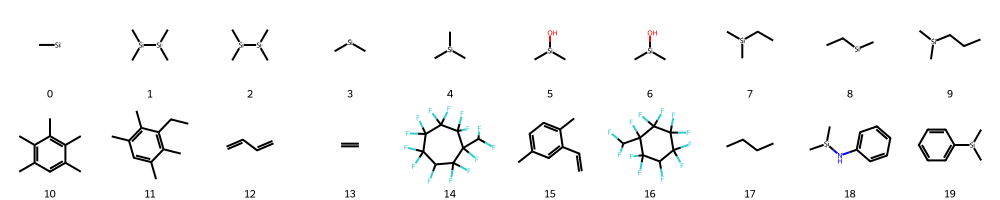

In [66]:
# get a list of molecules stored in moldata
molecules = moldata.get_mols()
# get images of molecules
MolData.draw_molecules(molecules, max_draw=20)

## **(1) Feature Encoding**

In [67]:
# print all the available feature extractors
print_feature_extractor()

Available feature extractors:
0: HeavyAtomExtractor
1: RingExtractor
2: AromaticRingExtractor
3: FingerPrintStructureExtractor
4: FeatureSumOperator


1- (1) Feature Encoding - Heavy Atom

In [68]:
# extract the number of heavy atoms in molecules
fs_atom = moldata.extract_features(HeavyAtomExtractor(moldata))
fs_atom.print_features()

heavy_atom:['atom:C', 'atom:Cl', 'atom:F', 'atom:N', 'atom:N+', 'atom:O', 'atom:O-', 'atom:S', 'atom:Si']


In [69]:
# print information on the 10-th molecule in moldata
moldata.print_mol_info_by_index(3)

Molecule: id=3 SMILES=C[Si]C SMARTS=[#6]-[Si]-[#6]
Properties:
  {'Polymer_ID': 747, 'Polymer_name': 'poly[(methylsilanediyl)methylene]', 'Tg (K)': 220.0979681, 'Td_1/2 (K)': 447.6687632, 'log10(P_CO2 (Barrer))': 4.010413602}
FeatureSet:heavy_atom
  {'atom:C': 2, 'atom:Si': 1}


1- (2) Feature Encoding - Ring

In [70]:
# extract the number of rings in molecules
fs_ring = moldata.extract_features(RingExtractor(moldata))
fs_ring.print_features()

ring:['ring:3', 'ring:4', 'ring:5', 'ring:6', 'ring:7']


1-(3) Feature Encoding - Aromatic Ring

In [71]:
# extract the number of aromatic rings in molecules
fs_aring = moldata.extract_features(AromaticRingExtractor(moldata))
fs_aring.print_features()

aromatic_ring:['aring:5', 'aring:6', 'aring:7']


1-(4) Feature Encoding - Fingerprint Structure

In [72]:
# extract fingerprint structure of radus 1
fs_fp_structure1 = moldata.extract_features(FingerPrintStructureExtractor(moldata, radius=1))
fs_fp_structure1.print_features()

finger_print_structure:radius=1:['fp:r1[C]:*#C', 'fp:r1[C]:*=C', 'fp:r1[C]:*=N', 'fp:r1[C]:*C', 'fp:r1[C]:*N', 'fp:r1[C]:*O', 'fp:r1[C]:*S', 'fp:r1[C]:*[NH3+]', 'fp:r1[C]:*[SiH3]', 'fp:r1[C]:C#*C', 'fp:r1[C]:C#*[SiH3]', 'fp:r1[C]:C*#N', 'fp:r1[C]:C*(=N)N', 'fp:r1[C]:C*(=O)O', 'fp:r1[C]:C*(=O)[O-]', 'fp:r1[C]:C*(C)(C)C', 'fp:r1[C]:C*(C)(C)F', 'fp:r1[C]:C*(C)(C)N', 'fp:r1[C]:C*(C)(C)O', 'fp:r1[C]:C*(C)(C)S', 'fp:r1[C]:C*(C)(Cl)Cl', 'fp:r1[C]:C*(C)(F)Cl', 'fp:r1[C]:C*(C)(F)F', 'fp:r1[C]:C*(C)(O)F', 'fp:r1[C]:C*(C)(O)O', 'fp:r1[C]:C*(C)=N', 'fp:r1[C]:C*(C)=O', 'fp:r1[C]:C*(C)C', 'fp:r1[C]:C*(C)Cl', 'fp:r1[C]:C*(C)F', 'fp:r1[C]:C*(C)N', 'fp:r1[C]:C*(C)O', 'fp:r1[C]:C*(C)S', 'fp:r1[C]:C*(C)[NH3+]', 'fp:r1[C]:C*(Cl)Cl', 'fp:r1[C]:C*(F)(F)F', 'fp:r1[C]:C*(F)Cl', 'fp:r1[C]:C*(F)F', 'fp:r1[C]:C*(N)=O', 'fp:r1[C]:C*(N)N', 'fp:r1[C]:C*(O)(F)F', 'fp:r1[C]:C*(O)(O)F', 'fp:r1[C]:C*(O)F', 'fp:r1[C]:C*(O)O', 'fp:r1[C]:C*=N', 'fp:r1[C]:C*=O', 'fp:r1[C]:C*C', 'fp:r1[C]:C*Cl', 'fp:r1[C]:C*F', 'fp:r1[C]:C*

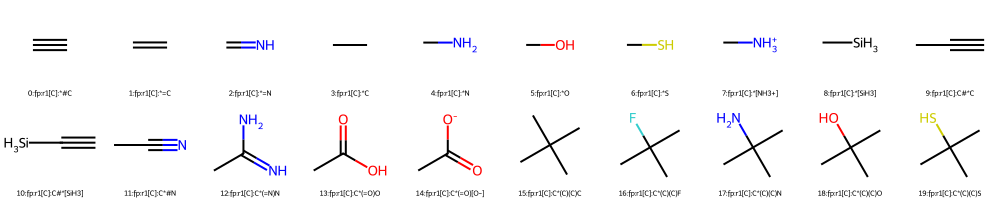

In [74]:
# draw extracted fingerprint structures of radius 1
MolData.draw_features(fs_fp_structure1, max_draw=20)

In [75]:
# extract fingerprint structure of radus 2
fs_fp_structure2 = moldata.extract_features(FingerPrintStructureExtractor(moldata, radius=2))
# fs_fp_structure1.print_features() --- too many for print all

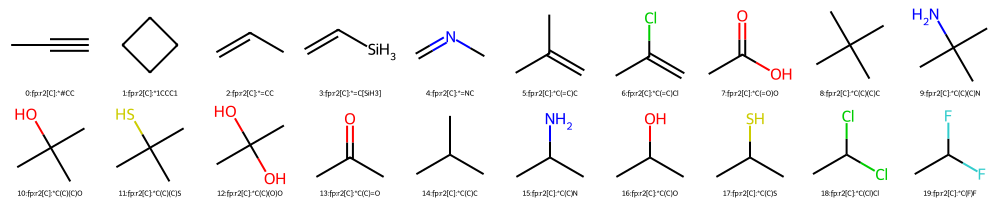

In [76]:
# draw extracted fingerprint structures of radius 2
MolData.draw_features(fs_fp_structure2, max_draw=20)

1-(5) Feature Operation: Sum of Feature Values

In [77]:
# extract the total number of atoms from heavy atom count
fs_atom_sum = moldata.extract_features(FeatureSumOperator(moldata, fs_atom))
fs_atom_sum.print_features()

heavy_atom:sum():['atom:sum']


In [78]:
# check the result of sum operation
moldata.get_dataframe(features=[fs_atom_sum, fs_atom])[:10]

,atom:sum,atom:C,atom:Cl,atom:F,atom:N,atom:N+,atom:O,atom:O-,atom:S,atom:Si
0,2,1,0,0,0,0,0,0,0,1
1,6,4,0,0,0,0,0,0,0,2
2,6,4,0,0,0,0,0,0,0,2
3,3,2,0,0,0,0,0,0,0,1
4,4,3,0,0,0,0,0,0,0,1
5,4,2,0,0,0,0,1,0,0,1
6,4,2,0,0,0,0,1,0,0,1
7,5,4,0,0,0,0,0,0,0,1
8,4,3,0,0,0,0,0,0,0,1
9,6,5,0,0,0,0,0,0,0,1


# (2) Preparation of Feature Vectors

In [79]:
# print extracted features
moldata.print_features()

feature set list:
  0: heavy_atom
  1: ring
  2: aromatic_ring
  3: finger_print_structure:radius=1
  4: finger_print_structure:radius=2
  5: heavy_atom:sum()


In [80]:
# get FeatureSet object by feature set id
fs_atom = moldata.get_features('heavy_atom')
fs_atom.print_features()
# get FeatureSet object by the index in a feature set list
fs_ring = moldata.get_features_by_index(1)
fs_ring.print_features()

heavy_atom:['atom:C', 'atom:Cl', 'atom:F', 'atom:N', 'atom:N+', 'atom:O', 'atom:O-', 'atom:S', 'atom:Si']
ring:['ring:3', 'ring:4', 'ring:5', 'ring:6', 'ring:7']


2-(1) Merging Feature Sets

In [81]:
# merge feature sets of "fp-structure of raidius 1"
# fs_fp_all = moldata.merge_features_by_index([6])
fs_fp_all = moldata.merge_features([fs_fp_structure1.id])

# merge feature sets of "heavy atom", "ring", "aromatic ring", and "fp-structure of raidus 1"
# features_fp = moldata.merge_features_by_index([0,1,2,6])
features_fp = moldata.merge_features([fs_atom.id, fs_ring.id, fs_aring.id, fs_fp_structure1.id])

In [82]:
# check the contents of mergered feature set
features_fp.print_features()

|aromatic_ring|finger_print_structure:radius=1|heavy_atom|ring|:['aring:5', 'aring:6', 'aring:7', 'fp:r1[C]:*#C', 'fp:r1[C]:*=C', 'fp:r1[C]:*=N', 'fp:r1[C]:*C', 'fp:r1[C]:*N', 'fp:r1[C]:*O', 'fp:r1[C]:*S', 'fp:r1[C]:*[NH3+]', 'fp:r1[C]:*[SiH3]', 'fp:r1[C]:C#*C', 'fp:r1[C]:C#*[SiH3]', 'fp:r1[C]:C*#N', 'fp:r1[C]:C*(=N)N', 'fp:r1[C]:C*(=O)O', 'fp:r1[C]:C*(=O)[O-]', 'fp:r1[C]:C*(C)(C)C', 'fp:r1[C]:C*(C)(C)F', 'fp:r1[C]:C*(C)(C)N', 'fp:r1[C]:C*(C)(C)O', 'fp:r1[C]:C*(C)(C)S', 'fp:r1[C]:C*(C)(Cl)Cl', 'fp:r1[C]:C*(C)(F)Cl', 'fp:r1[C]:C*(C)(F)F', 'fp:r1[C]:C*(C)(O)F', 'fp:r1[C]:C*(C)(O)O', 'fp:r1[C]:C*(C)=N', 'fp:r1[C]:C*(C)=O', 'fp:r1[C]:C*(C)C', 'fp:r1[C]:C*(C)Cl', 'fp:r1[C]:C*(C)F', 'fp:r1[C]:C*(C)N', 'fp:r1[C]:C*(C)O', 'fp:r1[C]:C*(C)S', 'fp:r1[C]:C*(C)[NH3+]', 'fp:r1[C]:C*(Cl)Cl', 'fp:r1[C]:C*(F)(F)F', 'fp:r1[C]:C*(F)Cl', 'fp:r1[C]:C*(F)F', 'fp:r1[C]:C*(N)=O', 'fp:r1[C]:C*(N)N', 'fp:r1[C]:C*(O)(F)F', 'fp:r1[C]:C*(O)(O)F', 'fp:r1[C]:C*(O)F', 'fp:r1[C]:C*(O)O', 'fp:r1[C]:C*=N', 'fp:r1[C]:C*=

In [83]:
# print merged features
moldata.print_merged_features()

merged feature set list:
  0: |finger_print_structure:radius=1|
  1: |aromatic_ring|finger_print_structure:radius=1|heavy_atom|ring|


In [84]:
# get merged feature sets by the index of merged feature set list printed above
features_1 = moldata.get_merged_features_by_index(1)
features_1.id

'|aromatic_ring|finger_print_structure:radius=1|heavy_atom|ring|'

In [85]:
# get feature vector as dataframe object
moldata.get_dataframe(features=features_fp)

,aring:5,aring:6,aring:7,fp:r1[C]:*#C,fp:r1[C]:*=C,fp:r1[C]:*=N,fp:r1[C]:*C,fp:r1[C]:*N,fp:r1[C]:*O,fp:r1[C]:*S,...,atom:N+,atom:O,atom:O-,atom:S,atom:Si,ring:3,ring:4,ring:5,ring:6,ring:7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1165,0,1,0,0,0,0,1,0,0,0,...,0,3,0,0,0,0,0,0,1,0
1166,0,1,0,0,0,0,1,0,0,0,...,0,3,0,0,0,0,0,0,1,0
1167,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0


In [86]:
# save feature vector in csv file (smiles and properties are also saved by default, so they are disabled by options)
moldata.write_csv('feature_fp.csv', smiles=False, property=False, features=features_fp)

2-(2) Visualizing Feature Vector Distribution

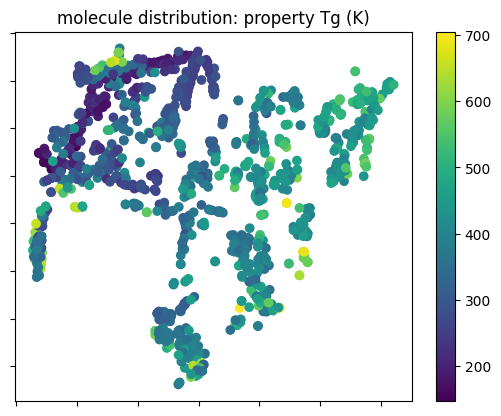

In [87]:
moldata.plot_distribution('Tg (K)', features_fp)

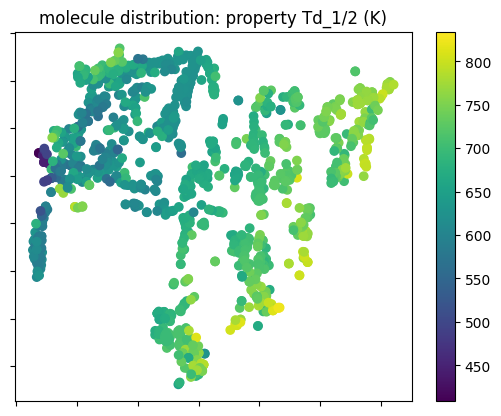

In [88]:
moldata.plot_distribution('Td_1/2 (K)', features_fp)

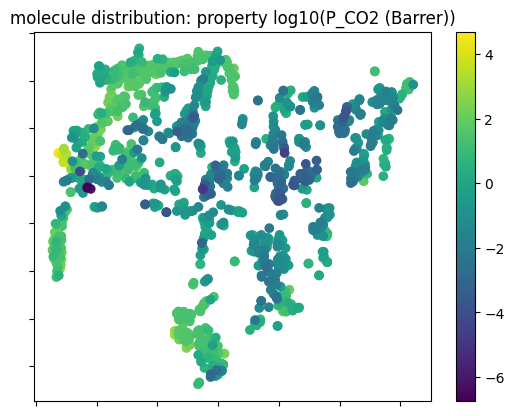

In [89]:
moldata.plot_distribution('log10(P_CO2 (Barrer))', features_fp)

# (3) Prediction

In [90]:
# print all the available regression models
print_regression_model()

Available regression models:
0: LinearRegressionModel
1: RidgeRegressionModel
2: LassoRegressionModel
3: ElasticNetRegressionModel
4: RandomForestRegressionModel


#### (3-0) Linear Regression Model

<font color="Coral">LinearRegressionModel</font> is implemented by wrapping [LinearRegression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) of the [scikit-learn](https://scikit-learn.org/stable/index.html) package. It fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation. Mathematically, it solves the following form:
    
$$ \min_{w} || X w - y||_2^2 $$

This regression model is the simplest linear regression without any regurlarization terms. So it is not so useful in general, especially when the feature vector size is quite large compared to the size of training data.

In [92]:
# apply regression model to specified target propetry 'log10(P_CO2 (Barrer))'
model = moldata.fit_regression_model(LinearRegressionModel(moldata, 'log10(P_CO2 (Barrer))', features_fp))

regression model cross validation target='log10(P_CO2 (Barrer))': data_size=1169: model:LinearRegression n_splits=3 shuffle=True


Let's check the coefficients determined by fitting the model to training data. Some coefficients are very large. Therefore, They are very  sensitive to the training data when the feature vector is very large and sparse.

In [93]:
# get coeeficients of the model
model.get_coef()

array([-5.49680195e-01, -3.86853682e-01, -6.93123122e-02, -1.31002173e+12,
       -1.31002173e+12,  1.22991314e+14, -1.31002173e+12,  6.82214581e+11,
        6.16211902e+12,  1.68214750e+13, -1.40308528e+14, -1.88050534e+13,
       -1.31002173e+12, -1.88050534e+13, -1.28651052e+14,  4.23434431e+14,
        6.65326485e+12,  3.06965925e+14, -1.31002173e+12, -6.78771900e+12,
        6.82214581e+11,  6.16211902e+12,  1.68214750e+13,  6.81788622e+13,
        7.97106451e+12, -1.22654163e+13,  6.84421754e+11,  1.36342598e+13,
       -1.94327276e+14, -8.18875901e+11, -1.31002173e+12,  1.34487618e+13,
       -6.78771900e+12,  6.82214581e+11,  6.16211902e+12,  1.68214750e+13,
       -1.46268753e+14,  2.82075453e+13, -1.77431135e+13,  7.97106451e+12,
       -1.22654163e+13,  1.17336041e+12, -8.04236966e+12, -4.79327551e+12,
        8.15656251e+12,  6.84421754e+11,  1.36342598e+13,  1.96326372e+13,
       -8.18875901e+11, -1.31002173e+12,  1.34487618e+13, -6.78771900e+12,
        6.82214581e+11,  

In [94]:
# get estimate of target property 'log10(P_CO2 (Barrer))' in dataframe
model.predict()[:5]

,'log10(P_CO2 (Barrer))':LinearRegression:fit
0,5.829165
1,4.180727
2,4.180727
3,4.727602
4,3.141665


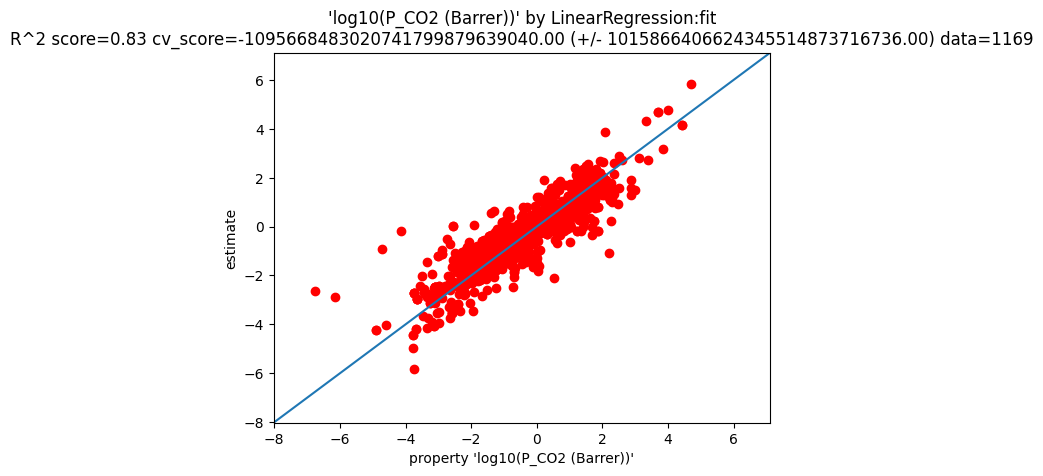

In [95]:
# plot estimate of parget propterty
model.plot_estimate()

#### (3-2) Ridge Regression Model

<font color="Coral">RidgeRegressionModel</font> is implemented by wrapping [Ridge](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) of the [scikit-learn](https://scikit-learn.org/stable/index.html) package. It minimizes the residual sum of squares with an L2 regularization term.

$$ \min_{w} || X w - y||_2^2 + \alpha ||w||_2^2 $$

The model has hyperparameter <font color="Blue">alpha</font> ($\alpha$). As <font color="Blue">alpha</font> increses, the L2 norm of the coefficients decreases. The model tends to be more robust to larger training data and colinearity of the features.

regression model cross validation target='log10(P_CO2 (Barrer))': data_size=1169: model:Ridge n_splits=3 shuffle=True


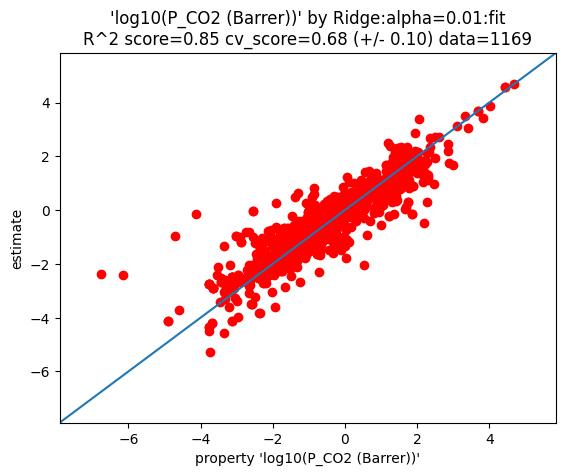

In [37]:
# apply Ridge regression model to specified target property 'log10(P_CO2 (Barrer))' with specified hyperparameter 'alpha'
model = moldata.fit_regression_model(RidgeRegressionModel(moldata, 'log10(P_CO2 (Barrer))', features_fp, alpha=0.01))
model.plot_estimate()

#### (3-3) Lasso Regression Model

<font color="Coral">LassoRegressionModel</font> is implemented by wraping [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso) of the [scikit-learn](https://scikit-learn.org/stable/index.html) package. It minimizes the residual sum of squares with an L1 regularization term.

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$


LassoRegressionModel has hyperparamter <font color="Blue">alpha</font> ($\alpha$). The model is useful for a large and sparse feature vector. However, a lot of colinerity in the feature vector may result in unstable performance. 

feature selection target='log10(P_CO2 (Barrer))': data_size=1169: model:Lasso:alpha=0.01:ini threshold=None
feature size:191 -> 109
regression model cross validation target='log10(P_CO2 (Barrer))': data_size=1169: model:Lasso n_splits=3 shuffle=True
R^2 score=0.84 cv_score=0.79 (+/- 0.03)


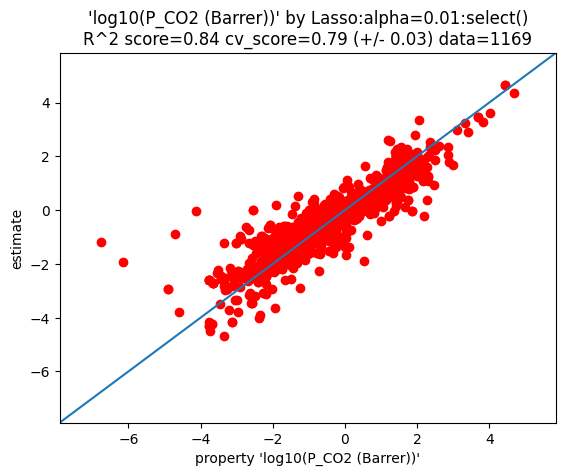

In [38]:
# apply Lasso regression model to specified target property 'log10(P_CO2 (Barrer))' with specified hyperparameter 'alpha'
model = moldata.select_features(LassoRegressionModel(moldata, 'log10(P_CO2 (Barrer))', features_fp, alpha=0.01))
model.plot_estimate()

 #### (3-4) ElasticNet Regression Model

<font color="Coral">ElasticNetRegressionModel</font> is implemented by wraping [ElasticNet](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) of the [scikit-learn](https://scikit-learn.org/stable/index.html) package. It minimizes the residual sum of squares with L1 and L2 regularization terms.

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$


The model has hyperparameters <font color="Blue">alpha</font> ($\alpha$) and <font color="Blue">l1_ratio</font> ($\rho$). Since the model has both of the characteristics of Ridge and Lasso, it is useful for a large and sparse feature vector with some colenerity.

feature selection target='log10(P_CO2 (Barrer))': data_size=1169: model:ElasticNet:alpha=0.01 l1_ratio=0.2:ini threshold=None
feature size:191 -> 56
regression model cross validation target='log10(P_CO2 (Barrer))': data_size=1169: model:ElasticNet n_splits=3 shuffle=True
R^2 score=0.83 cv_score=0.76 (+/- 0.07)


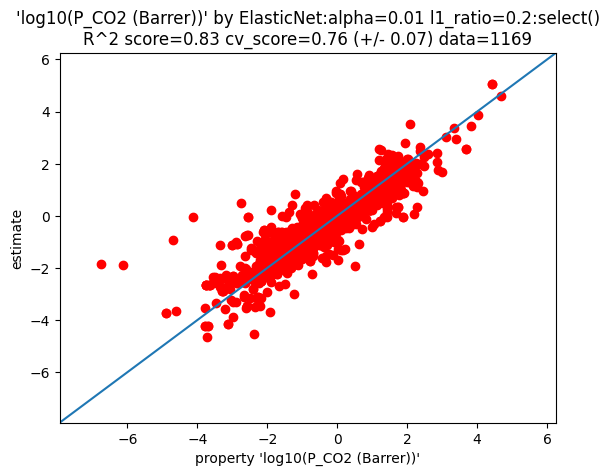

In [39]:
# apply Elastic regression model to specified target property 'log10(P_CO2 (Barrer))' with specified hyperparameter
model = moldata.select_features(ElasticNetRegressionModel(moldata, 'log10(P_CO2 (Barrer))', features_fp, alpha=0.01, l1_ratio=0.2))
model.plot_estimate()

#### (3-5) Random Forest Regression Model




<font color="Coral">RandomForestRegressionModel</font> is implemented by wrapping [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) of the [scikit-learn](https://scikit-learn.org/stable/index.html) package. The model fits a number of classifying decision trees on various samples of the dataset and obtains average values, thus improving the predictive accuracy as well as controlling overfitting. 

The model has hyperparameter <font color="Blue">min_samples_split</font>.

Feature selection is performed by comparing ``feature_importances_`` of the model with the threshold of the feature selection.

regression model parameter optimization target='log10(P_CO2 (Barrer))': data_size=1169: model:RandomForestRegressor n_splits=3 shuffle=True
optimized parameters: {'min_samples_split': 2}
regression model cross validation target='log10(P_CO2 (Barrer))': data_size=1169: model:RandomForestRegressor n_splits=3 shuffle=True
R^2 score=0.98 cv_score=0.89 (+/- 0.02)
feature selection target='log10(P_CO2 (Barrer))': data_size=1169: model:RandomForestRegressor:min_samples_split=2:opt threshold=None
feature size:191 -> 191
regression model cross validation target='log10(P_CO2 (Barrer))': data_size=1169: model:RandomForestRegressor n_splits=3 shuffle=True
R^2 score=0.98 cv_score=0.89 (+/- 0.02)


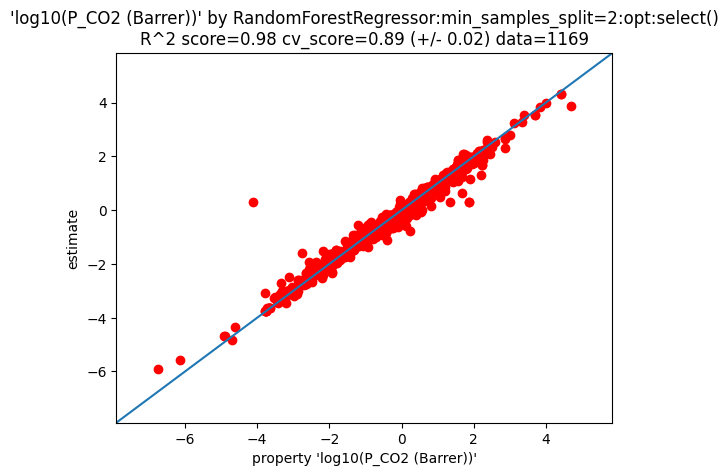

In [40]:
# optimize hyperparameters by grid seach
# default seach grid is 
# param_grid = {'min_samples_split': np.arange(2, 4, dtype=np.int)}
model = moldata.optimize_and_select_features(RandomForestRegressionModel(moldata, 'log10(P_CO2 (Barrer))', features_fp))
model.plot_estimate()

### (4) Summary of Stored Models

In [42]:
# Get a summary of regression models for property 'log10(P_CO2 (Barrer))'
legends = {fs_atom.id: 'atom',
           fs_ring.id: 'ring',
           fs_aring.id: 'aring',
           fs_fp_structure1.id: 'fp1'}
df_model_PCO2 = moldata.get_regression_model_summary('log10(P_CO2 (Barrer))', legends=legends)
HTML(df_model_PCO2.to_html(escape=False))

,model,model_id,score,cv_score,cv_score(std),rmse,size,aring (3),fp1 (174),atom (9),ring (5)
0,,RandomForestRegressor:min_samples_split=2:opt:select(),0.980951,8.935256e-01,2.092840e-02,0.223620,191,3,174,9,5
1,,Lasso:alpha=0.01:select(),0.840011,7.878087e-01,3.030363e-02,0.648070,109,1,98,6,4
2,,ElasticNet:alpha=0.01 l1_ratio=0.2:select(),0.827708,7.580666e-01,7.386025e-02,0.672528,56,0,50,5,1
3,,Ridge:alpha=0.01:fit,0.852880,6.832177e-01,1.016269e-01,0.621461,191,3,174,9,5
4,,LinearRegression:fit,0.830071,-8.234153e+26,1.063513e+27,0.667900,191,3,174,9,5


# Best Model

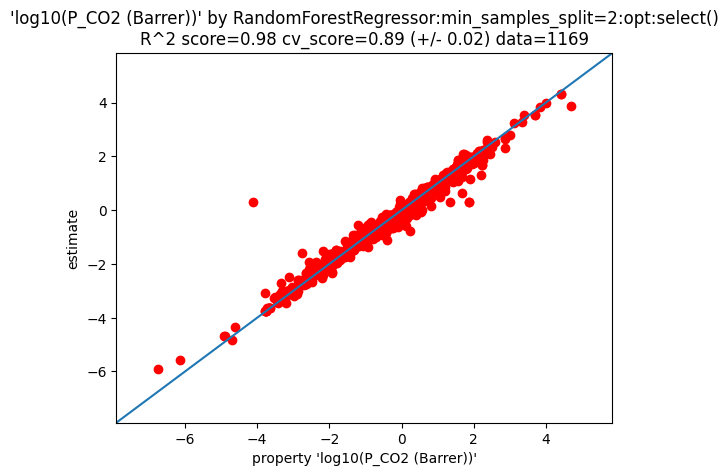

In [43]:
# get a best regression modesl for property 'log10(P_CO2 (Barrer))'
best_model_PCO2 = df_model_PCO2['model'][0]
best_model_PCO2.plot_estimate()